# Step 1: Download the files
You should download all of the necessary files, based on your questions. Theunnisen and Mets each provide sample data sets that you could use. Xeno-Canto.org has an excellent resource of open source songs. If your data set is relatively small (<200 songs) you could consider doing this by hand. For todays walkthrough, you will just need SongD(KL) and BioSound.

•	David Mets. “"SongD(KL), an automated approach to the quantitation of vocal  
learning in the songbird". https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006437&rev=2
script1: https://doi.org/10.1371/journal.pcbi.1006437.s006
script2: https://doi.org/10.1371/journal.pcbi.1006437.s007
dataset: https://datadryad.org/resource/doi:10.5061/dryad.8tn4660

•	Frederic Theunnisen. “BioSound: a python library and notebooks to extract sound features for bio-acoustical analyses” https://github.com/theunissenlab/soundsig https://github.com/theunissenlab/BioSoundTutorial https://link.springer.com/article/10.1007%2Fs10071-015-0933-6
  
•	Tim Sainburg. “Generative modelling for birdsong: learning acoustic spaces for generating stimuli, labelling syllables, and visualizing sequences”. https://github.com/timsainb/AVGN
 
•	Yarden Cohen. “Segmentation and annotation of birdsong with a hybrid recurrent-convolutional neural network”. https://github.com/yardencsGitHub/tweetynet  https://www.abstractsonline.com/pp8/#!/4649/presentation/32476


# Step 2: Standardize File Formats
You will need your song files to be in a folder of mono .wav files. That means you may need to convert them from .mp3 to .wav and from stereo to mono. We will do both below, starting with a quick loop to convert .mp3 to .wav

NOTE: If you prefer, you can convert files using Audacity, using the "Edit Chain" and "Apply Chain" options under the File menu. 

In [ ]:
import subprocess

# This is the command to convert song files. You can implement a loop for multiple files
subprocess.call(['ffmpeg','-i','./songFiles/XC380406 - Night Parrot - Pezoporus occidentalis.mp3','./songFiles/nightParrot.wav'])

Convert stereo to mono: 

In [ ]:
import os
from scipy.io import wavfile


in_dir = './Sorted/White_Rasberry/'
out_dir = './Sorted_Mono/White_Rasberry/'

files = os.listdir(in_dir)

## GENERATE MONO FILE ##
for filename in files:
    source_wav = wave.open(in_dir + filename,'r')
    params = source_wav.getparams()
    fs, data = wavfile.read(in_dir + filename)
    source_wav.close()
    
    out_wav = wave.open(out_dir + filename, 'w')
    out_wav.setparams(params)
    out_wav.setnchannels(1)
    
    # Here we're averaging the two. Depending on your files, it might be better to just pick one.
    mono_data = data.sum(1) / 2 
    out_wav.writeframes(mono_data)
    out_wav.close()

print('I did it!')


You should now have a folder full of mono, .wav formatted songs. Let's do a quick visualization:

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # This is added back by InteractiveShellApp.init_path()


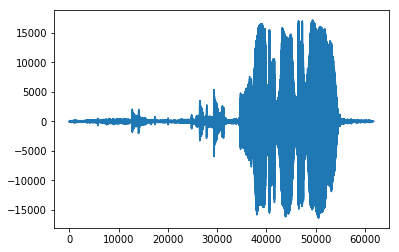

In [84]:
## This is a very quick (and slightly dirty) way to plot a wav file
%matplotlib inline 

import wave, pylab
import sys, os
from matplotlib import pyplot as plt

# Set your file path below
wav_file = './BOD.wav'  
wav = wave.open(wav_file,'r')
frames = wav.readframes(-1)
sound_info = pylab.frombuffer(frames,'Int16')
frame_rate = wav.getframerate()

plt.plot(sound_info)
#plt.savefig('BOD_wav.png')
plt.show()

That was just a wav plot, displaying sound pressure over time (or technically time bin), lets do a spectrogram below. We will also read the data in as an array using scipy, which will help if we want to do any additional analysis directly

In [ ]:
# This is a good way to plot the spectrogram, and a slightly cleaner way to read in the data as an array for custom analysis.

from scipy.signal import spectrogram
import scipy.io.wavfile as wf
import numpy as np

frames,data = wf.read(wav_file)

if len(np.shape(data)) == 2:
    sound_info = data[:,0] #This checks if your file is stereo or mono and adjusts accordingly
else:
    sound_info = data

# Set up your time bins so the plot looks nice
ts = np.arange(len(sound_info)) / frames

# Plot the wavform
plt.plot(ts,sound_info)
plt.show()

#Build the spectrogram. Sxx is your data, t is the time bin labels, and f is the frequency bin labels
f,t,Sxx = spectrogram(sound_info, frames)
Sxx = np.flipud(Sxx) 

# The log transform will help for visualization, vmin is a high-pass amplitude filter to reduce background noise
Sxx = np.log(Sxx) # This line is optional
plt.imshow(Sxx,aspect='auto',vmin = 0) # You can change vmin to see what it does

# Step 3: Get Song D(kl)
Now we will implement David Mets's package on KL Divergence of song. (download above if you haven't yet)

You need to know the numbers of syllables, which can be estimated using David Mets's Script 2, or you can count them by eye using the visualizations above. The instructions are in the file, but the syntax is as follows: 

python Song_D_KL_calc.py folder_with_songs_from_bird_1 folder_with_songs_from_bird_2 number_of_syllable_calsses_bird_1 number_of_syllable_classes_bird_2

You could conceivably run this out of a jupyter notebook, but it would be better to just run it out of the terminal (check the python primer materials if you've forgotten how to do this). There are a couple dependencies for Song_D_KL_calc.py. You'll likely need to use conda and/or pip to install them. The only one I didn't have already was mahotas, but David indicates that it's optional. Comment it out and uncomment the indicated line that replaces it in the file, or just install it. 

# Step 4: Run the BioSound Jupyter notebooks

Download and run Fred Theeunnisen's very nice jupyter notebooks, they explain everything that you will do. You could use the output from this package to build a clustering algorithm, for example. 

# Step 5: Perform your analysis

The above scripts provide several different metrics which you can then analyze in the way that seems most reasonable to you and your question. You can also incorporate phylogenetic data from BirdTree.org 

# Step Z: Scrape Xeno-Canto:

CAVEAT: Scraping a website can put a lot of strain on their server. Don't just run a for loop and try to download the entire database all at once as you may crash the server, and you don't want to run afoul of a bunch of birders. Add delays between the download, and consider which songs you actually need to download (this will also make things easier for you in storing and processing the data). 

We'll use the python package BeautifulSoup to download links. (You may have to install this also) The Chrome "Inspect" option is also useful here to get a sense of what we're looking for. We'll need to decide which birds we're using, and then identify and download the link. Let's try this first for a single page: https://www.xeno-canto.org/species/Emberiza-pusilla

If we inspect the first listing, we can see that the download link is coded as follows (including both the sound file and the image link:

There may be other download links scattered around that we don't want, so we may want to look for both, and download everything that matches. 

In [ ]:
from bs4 import BeautifulSoup, SoupStrainer
import requests, sys
import time, random


# We can do this with an html file we download, which is what I did because I was about to board a plane
#test_file = open('./Little Bunting (Emberiza pusilla) __ xeno-canto.html','r') 
#strained_soup = BeautifulSoup(test_file, 'html.parser', parse_only=SoupStrainer('a'))

# We will first request our page, and process it into an object python can handle
test_link = 'https://www.xeno-canto.org/species/Emberiza-pusilla'
test_page = requests.get(test_link)

## This line spits out a nice object where each element is a line of html code, already quite filtered
strained_soup = BeautifulSoup(test_page.text,'html.parser',parse_only=SoupStrainer('a'))

# Now we walk through our lines of html, check for download links, and download and save them

# First just a print statement to see what we'll be getting, then uncomment out the rest to actually download the links.
for line in strained_soup:
    if line.has_attr('download'):
        #print('grabbing:',line)
        mylink = line['href']
        print(line)
        """
        r = requests.get(line['href'])
        with open(line['download'], 'wb') as f:
            f.write(r.content)
        sleep_time = random.randrange(2,4)
        #print('mp3 saved, sleeping for ',sleep_time)
        time.sleep(sleep_time)
        """
   

Now we can loop through all the pages for a species. You could be clever here to make your data cleaner, for example, you could check the quality of recording and only download 'A' rated songs, or you could check the time, and only download songs < 1 minute. Or you could record all the songs from the morning and compare them to songs from the afternoon. Think hard about what your actual question is here and whether the data you're downloading is what you need, then make changes accordingly. 

In [86]:
species = 'Emberiza-pusilla'
pages = 6

#Function to download all the links on a page
def download_links(page_link):
    page_object = requests.get(page_link)
    strained_soup = BeautifulSoup(page_object.text, 'html.parser', parse_only=SoupStrainer('a'))
    for line in strained_soup:
        if line.has_attr('download'):
            #print('grabbing:',line)
            if 'https' in line['href']:
                download_link = line['href']
            else:
                download_link = 'https://www.xeno-canto.org' + line['href']
            #r = requests.get(line['href'])
            r = requests.get(download_link) 
            with open(line['download'], 'wb') as f: # You might want to put this in a specific file or something. 
                f.write(r.content) 
            sleep_time = random.randrange(2,7)
            # We set up a delay between each download.
            # 7 sec is probably very conservative, but I don't know what this site can handle
            #print('mp3 saved, sleeping for ',sleep_time)
            time.sleep(sleep_time) 

# Now we just loop through each page. Easy peasy.
for p in range(pages):
    print('working on page',p)
    page = str(p + 1)
    page_link = 'https://www.xeno-canto.org/species/' + species + '?pg=' + page
    download_links(page_link)
    time.sleep(1)
    




working on page 1
working on page 2
working on page 3
working on page 4
working on page 5
